In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

In [2]:
df = pd.read_csv('fns_for_model.csv')
df

,IID;year;quarter;employee_num;fot;income;income_lic;taxesProfit;taxesVAT;taxesEmplSal;insurance;isIT;isSpecialTaxRegime_insurance;isSpecialTaxRegime_profit;taxType;businessSize;isIP
0,2141;2019;1;151.33333333333334;60426530.47;390...
1,2141;2019;2;157.0;122440460.71;107656862.0;211...
2,2141;2019;3;170.66666666666666;183698929.63;18...
3,2141;2019;4;172.0;249518697.91;431550201.0;776...
4,2141;2020;1;168.66666666666666;64273675.64;138...
...,...
412528,100228937383;2021;2;1.0;82105.26;0.0;0.0;0;0;2...
412529,100228937383;2021;3;1.6666666666666667;173923....
412530,100229077630;2020;3;0.0;0.0;220842.0;0.0;0;368...
412531,100229077630;2020;4;0.0;0.0;331666.0;0.0;0;184...


### Причешим вид таблицы:

In [3]:
name = str(df.columns)[8:189]
data = df[name].str.split(';',expand=True)
data.columns = name.split(';')
convert_dict = {}
for col in data.columns:
    if (col in ['employee_num', 'fot', 'income', 'income_lic', 'taxesProfit','taxesVAT','taxesEmplSal','insurance']):
        convert_dict[col] = float
    else:
        convert_dict[col] = int
data = data.astype(convert_dict)
data #с такой таблицей можно уже и поработать

,IID,year,quarter,employee_num,fot,income,income_lic,taxesProfit,taxesVAT,taxesEmplSal,insurance,isIT,isSpecialTaxRegime_insurance,isSpecialTaxRegime_profit,taxType,businessSize,isIP
0,2141,2019,1,151.333333,6.042653e+07,39003298.0,13650750.0,14022.0,1229036.0,7860574.0,17010437.67,1,0,0,1,2,0
1,2141,2019,2,157.000000,1.224405e+08,107656862.0,21120896.0,30211.0,7023881.0,14738957.0,33958990.80,1,0,0,1,2,0
2,2141,2019,3,170.666667,1.836989e+08,189147659.0,2930912.0,64047.0,7651800.0,23893638.0,48929790.63,1,0,0,1,2,0
3,2141,2019,4,172.000000,2.495187e+08,431550201.0,77639346.0,2105889.0,30629631.0,32213924.0,62660822.03,1,0,0,1,2,0
4,2141,2020,1,168.666667,6.427368e+07,138196601.0,30673842.0,0.0,19735329.0,8376352.0,19181688.37,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412528,100228937383,2021,2,1.000000,8.210526e+04,0.0,0.0,0.0,0.0,2600.0,20306.78,0,0,0,0,0,1
412529,100228937383,2021,3,1.666667,1.739234e+05,0.0,0.0,0.0,0.0,8074.0,43527.43,0,0,0,0,0,1
412530,100229077630,2020,3,0.000000,0.000000e+00,220842.0,0.0,0.0,36807.0,0.0,0.00,0,0,0,2,1,1
412531,100229077630,2020,4,0.000000,0.000000e+00,331666.0,0.0,0.0,18471.0,0.0,0.00,0,0,0,2,1,1


### Посчитаем среднее значение ежегодного дохода для каждой четверти

In [4]:
df_mean = data.groupby(['year', 'quarter']).mean()[['income']]
df_mean.reset_index(inplace = True)
df_mean

,year,quarter,income
0,2019,1,1.629924e+07
1,2019,2,3.657961e+07
2,2019,3,5.851577e+07
3,2019,4,8.580618e+07
4,2020,1,2.444406e+07
5,2020,2,4.916247e+07
6,2020,3,7.635477e+07
7,2020,4,1.154191e+08
8,2021,1,2.800461e+07
9,2021,2,5.961354e+07


<AxesSubplot:xlabel='year', ylabel='income'>

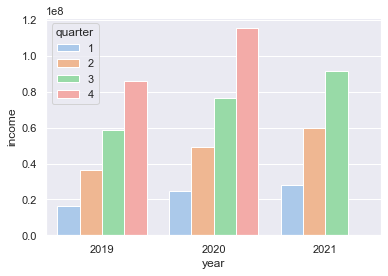

In [8]:
sns.barplot(data=df_mean, x="year", y="income", hue="quarter", palette = "pastel")

### Посчитаем дисперсию (среднее линейное отклонение)

In [6]:
data['error'] = 0

def find_err(row, mean_m):
    return abs(row['income'] - mean_m)

for year in range(2019, 2022):
    for q in range(1,5):
        if ((year != 2022) and (q != 4)):
            df_r = data[(data['year'] == year) & (data['quarter'] == q)]
            income = df_mean.iloc[df_mean[(df_mean['year'] == year) & (df_mean['quarter'] == q)].index[0]]['income']
            data.loc[df_r.index, 'error'] = df_r.apply(find_err, args=(income, ), axis = 1)

data

,IID,year,quarter,employee_num,fot,income,income_lic,taxesProfit,taxesVAT,taxesEmplSal,insurance,isIT,isSpecialTaxRegime_insurance,isSpecialTaxRegime_profit,taxType,businessSize,isIP,error
0,2141,2019,1,151.333333,6.042653e+07,39003298.0,13650750.0,14022.0,1229036.0,7860574.0,17010437.67,1,0,0,1,2,0,2.270406e+07
1,2141,2019,2,157.000000,1.224405e+08,107656862.0,21120896.0,30211.0,7023881.0,14738957.0,33958990.80,1,0,0,1,2,0,7.107725e+07
2,2141,2019,3,170.666667,1.836989e+08,189147659.0,2930912.0,64047.0,7651800.0,23893638.0,48929790.63,1,0,0,1,2,0,1.306319e+08
3,2141,2019,4,172.000000,2.495187e+08,431550201.0,77639346.0,2105889.0,30629631.0,32213924.0,62660822.03,1,0,0,1,2,0,0.000000e+00
4,2141,2020,1,168.666667,6.427368e+07,138196601.0,30673842.0,0.0,19735329.0,8376352.0,19181688.37,1,0,0,1,2,0,1.137525e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412528,100228937383,2021,2,1.000000,8.210526e+04,0.0,0.0,0.0,0.0,2600.0,20306.78,0,0,0,0,0,1,5.961354e+07
412529,100228937383,2021,3,1.666667,1.739234e+05,0.0,0.0,0.0,0.0,8074.0,43527.43,0,0,0,0,0,1,9.138794e+07
412530,100229077630,2020,3,0.000000,0.000000e+00,220842.0,0.0,0.0,36807.0,0.0,0.00,0,0,0,2,1,1,7.613393e+07
412531,100229077630,2020,4,0.000000,0.000000e+00,331666.0,0.0,0.0,18471.0,0.0,0.00,0,0,0,2,1,1,0.000000e+00


In [7]:
df_error = data.groupby(['year', 'quarter']).mean()[['error']]
df_error.reset_index(inplace = True)
df_error

,year,quarter,error
0,2019,1,2.589102e+07
1,2019,2,5.779242e+07
2,2019,3,9.242417e+07
3,2019,4,0.000000e+00
4,2020,1,3.799237e+07
5,2020,2,7.624262e+07
6,2020,3,1.183237e+08
7,2020,4,0.000000e+00
8,2021,1,4.985421e+07
9,2021,2,1.060900e+08


<AxesSubplot:xlabel='year', ylabel='error'>

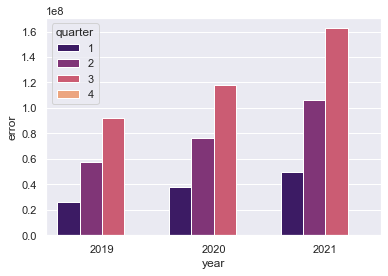

In [9]:
sns.barplot(data=df_error, x="year", y="error", hue="quarter", palette = "magma")